Taking `examples/examples.ipynb` as a starting point.  

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append("..")
sys.path.append("../..")

import numpy as np 
import pandas as pd
import yellowbrick as yb
import matplotlib.pyplot as plt

/Users/pschafer/.pyenv/versions/3.6.2/envs/yellowbrick/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Dataset

In [3]:
from download import download_all 

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
}

def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Return the data frame
    return pd.read_csv(path)

In [4]:
# Load the classification data set
data = load_data('occupancy') 
print(len(data))
data.head()

20560


,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Get a small sample for demo-ing
X = data.head(1000)[features]
y = data.head(1000).occupancy

## Plot all the things

In [6]:
from yellowbrick.features import (Rank1D, 
                                  Rank2D,
                                  ScatterViz,
                                  RadViz,
                                  ParallelCoordinates,
                                  JointPlotVisualizer
                                 )
from yellowbrick.pipeline import VisualPipeline

dataframe version

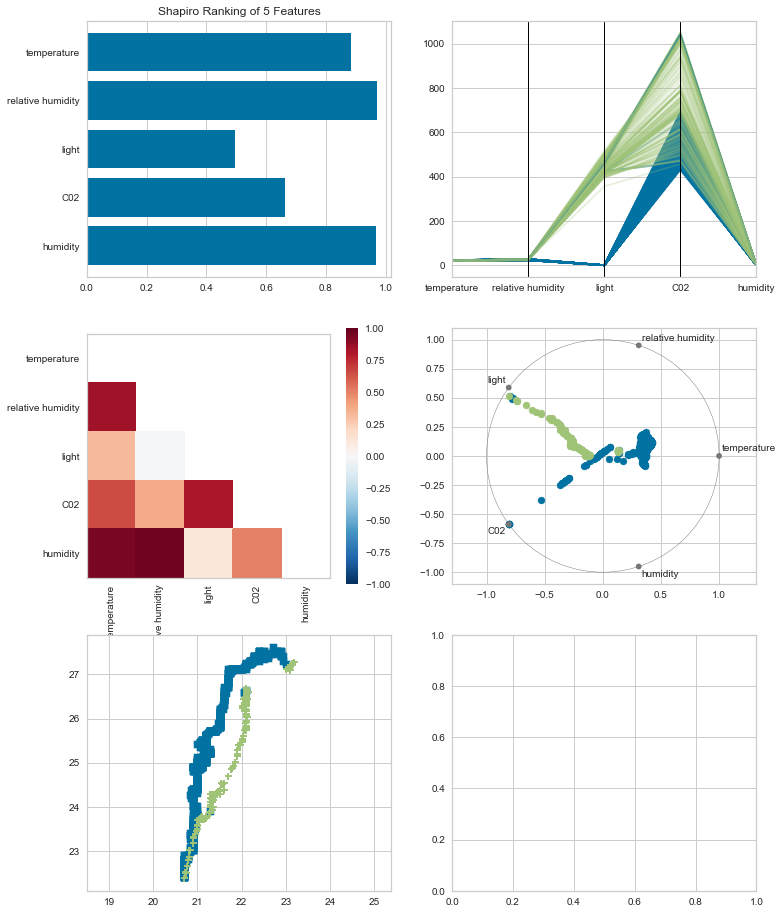

In [7]:
fig, ax = plt.subplots(3, 2, figsize=[12, 16])
pl = VisualPipeline([
    ('rank1d', Rank1D(features=features, ax=ax[0,0])),
    ('rank2d', Rank2D(features=features, ax=ax[1,0])),
    ('pcoords', ParallelCoordinates(features=features, classes=classes, ax=ax[0,1])),
    ('radviz', RadViz(features=features, classes=classes, ax=ax[1,1])),
    ('scatter', ScatterViz(features=features[:2], classes=classes, ax=ax[2,0])),
#     ('joinplot', JointPlotVisualizer(feature=features[0], cvax=ax[2,1])),
])
pl.fit_transform_poof(X, y);

numpy version

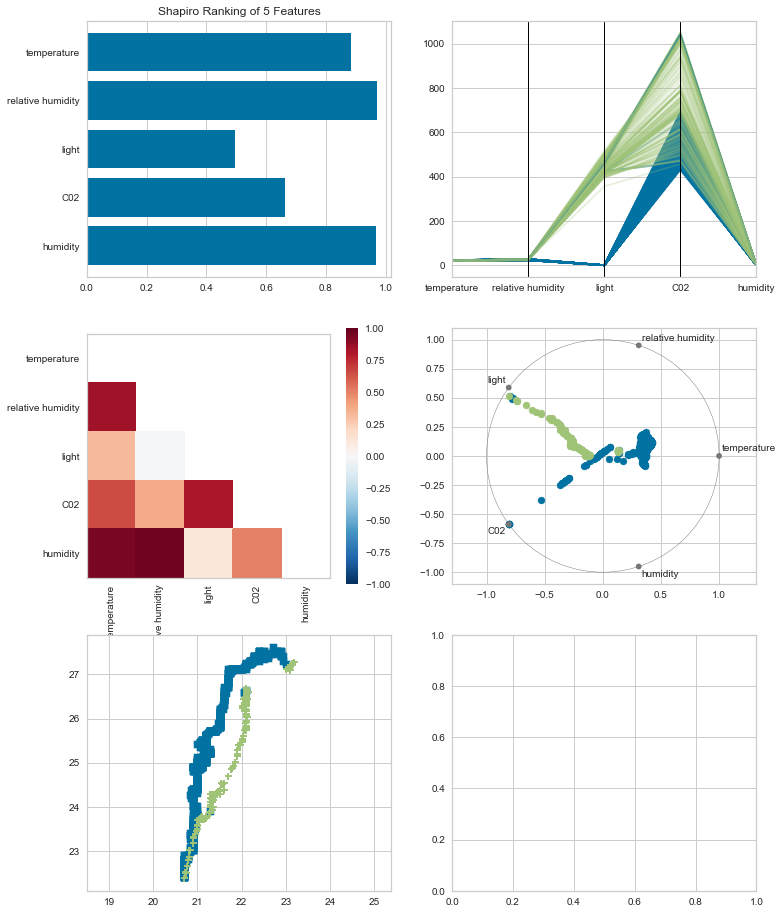

In [8]:
fig, ax = plt.subplots(3, 2, figsize=[12, 16])
pl = VisualPipeline([
    ('rank1d', Rank1D(features=features, ax=ax[0,0])),
    ('rank2d', Rank2D(features=features, ax=ax[1,0])),
    ('pcoords', ParallelCoordinates(features=features, classes=classes, ax=ax[0,1])),
    ('radviz', RadViz(features=features, classes=classes, ax=ax[1,1])),
    ('scatter', ScatterViz(x=0, y=1, classes=classes, ax=ax[2,0])),
#     ('joinplot', JointPlotVisualizer(feature=features[0], cvax=ax[2,1])),
])
pl.fit_transform_poof(X.values, y);